# Visualizações Cíclicas

In [10]:
import pandas as pd
import numpy as np
from datetime import date
from mosqlient.datastore import Infodengue
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm, colors
import os
import dotenv

In [8]:
dotenv.load_dotenv()

True

In [2]:
disease = 'dengue'
geocode = 3550308 
names = {
    3304557: 'Rio de Janeiro',
    3550308: 'São Paulo'
}
end_date = date.today().strftime('%Y-%m-%d')

In [11]:
df = Infodengue.get(disease =  disease,
                    start = "2010-01-01",
                    end = end_date, 
                    geocode = geocode,
                    api_key=os.getenv("MOSQLIMATE_API_KEY"))
df = pd.DataFrame(df)
df['data_iniSE'] = pd.to_datetime(df['data_iniSE'])
df.set_index('data_iniSE', inplace = True )

df = df.resample('W-SUN').sum()
df['EW'] = [int(str(s)[-2:]) for s in df.SE]
df['year'] = [int(str(s)[:-2]) for s in df.SE]
df.head()

100%|██████████| 2/2 [00:01<00:00,  1.20requests/s]


,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,EW,year
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2010-01-03,201001,123.0,123,123.0,123,3550308,0.0,0.997953,0,1,...,50.428571,23.845891,29.428571,49.0,0,0,0,0,1,2010
2010-01-10,201002,144.0,144,144.0,144,3550308,0.0,1.168335,0,1,...,45.285714,24.218276,28.571429,46.0,0,0,0,0,2,2010
2010-01-17,201003,168.0,168,168.0,168,3550308,0.0,1.363058,0,2,...,51.000000,23.334464,28.000000,43.0,0,0,0,0,3,2010
2010-01-24,201004,203.0,203,203.0,203,3550308,0.0,1.647028,0,2,...,62.714286,21.996652,26.428571,75.0,0,0,0,0,4,2010
2010-01-31,201005,247.0,247,247.0,247,3550308,0.0,2.004019,0,2,...,31.000000,25.129981,32.428571,103.0,0,0,0,0,5,2010


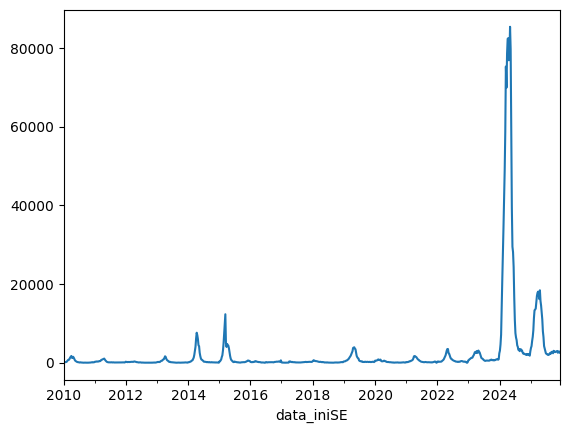

In [12]:
df.casos_est.plot();

In [13]:
df2 = df.sort_index().reset_index()
df2['ew_r'] = df2.EW*(2*np.pi/52.)

In [14]:
def plot_polar(logscale=True):
    cmap = cm.jet((df2.year-df.year.min())/(df2.year.max()-df.year.min()))
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_xticklabels(np.linspace(1,52,9, dtype=int))
    if logscale:
        ax.set_yscale("log")
        title = f'Log(Casos) de {disease} entre 2010 e 2025 - {names[geocode]}'
    else:
        title = f'Casos de {disease} entre 2010 e 2025 - {names[geocode]}'
    ax.plot(df2.ew_r,df2.casos_est,color='gray',lw=1, alpha=0.3)
    sct = ax.scatter(df2.ew_r,df2.casos_est,s=10, c=cmap);
    # cb = plt.colorbar(sct, ax=ax)
    fig.colorbar(cm.ScalarMappable(colors.Normalize(2010,2026, True), cmap=cm.jet), ax=ax)
    cb.set_ticks(ticks=np.linspace(0,1, 16), labels=[str(y) for y in range(df2.year.min(), df2.year.max()+1)])
    # cb.set_ticklabels([str(y) for y in range(df2.year.min(), df2.year.max()+1)])
    
    ax.set_title(title)
    ax.set_xlabel('Semanas');
    plt.savefig(f'polar_{disease}_{names[geocode]}_log.png' if logscale else f'polar_{disease}_{names[geocode]}.png')

/tmp/ipykernel_58768/3736093532.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.linspace(1,52,9, dtype=int))


NameError: name 'cb' is not defined

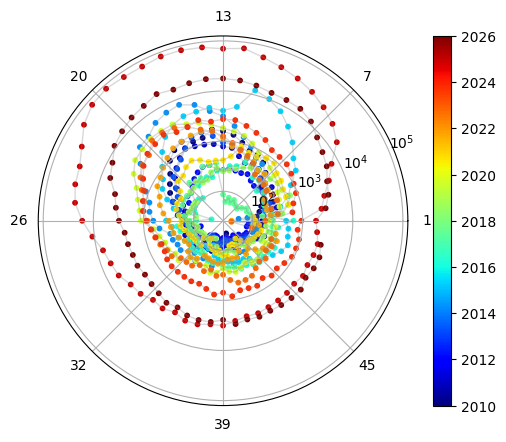

In [15]:
plot_polar();

/tmp/ipykernel_352968/3736093532.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.linspace(1,52,9, dtype=int))


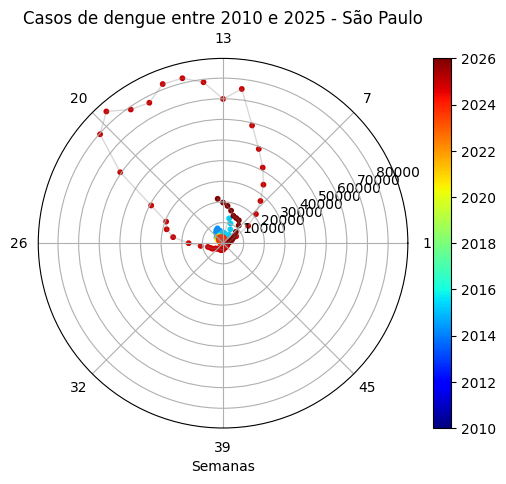

In [67]:
plot_polar(False)

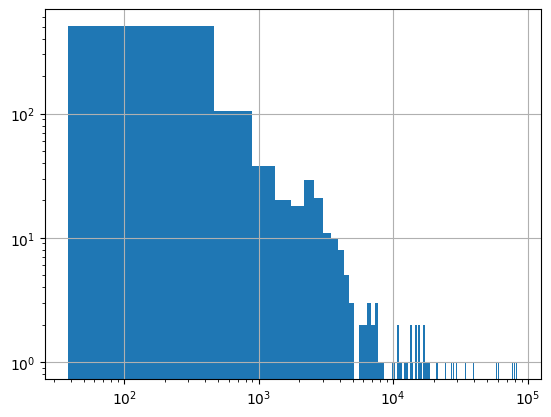

In [16]:
df2.casos.hist(bins=200)
plt.yscale("log")
plt.xscale("log")


In [17]:
df2

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,EW,year,ew_r
0,2010-01-03,201001,123.0,123,123.0,123,3550308,0.000000,0.997953,0,...,23.845891,29.428571,49.0,0,0,0,0,1,2010,0.120830
1,2010-01-10,201002,144.0,144,144.0,144,3550308,0.000000,1.168335,0,...,24.218276,28.571429,46.0,0,0,0,0,2,2010,0.241661
2,2010-01-17,201003,168.0,168,168.0,168,3550308,0.000000,1.363058,0,...,23.334464,28.000000,43.0,0,0,0,0,3,2010,0.362491
3,2010-01-24,201004,203.0,203,203.0,203,3550308,0.000000,1.647028,0,...,21.996652,26.428571,75.0,0,0,0,0,4,2010,0.483322
4,2010-01-31,201005,247.0,247,247.0,247,3550308,0.000000,2.004019,0,...,25.129981,32.428571,103.0,0,0,0,0,5,2010,0.604152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,2025-11-09,202546,3047.5,2999,3130.0,2953,3550308,0.994391,24.979140,0,...,17.668300,22.171814,446.0,0,0,0,0,46,2025,5.558202
828,2025-11-16,202547,2594.0,2512,2734.0,2444,3550308,0.000011,21.261982,0,...,20.050957,24.327457,375.0,0,0,0,0,47,2025,5.679033
829,2025-11-23,202548,2852.0,2715,3131.0,2587,3550308,0.361167,23.376705,0,...,18.852829,23.514171,394.0,0,0,0,0,48,2025,5.799863
830,2025-11-30,202549,2941.0,2555,3800.0,2280,3550308,0.974167,24.106201,0,...,21.187029,26.369229,329.0,0,0,0,0,49,2025,5.920694


In [19]:
import plotly.express as px

In [20]:
df2['ew_dg'] = df2.EW*(360/52.)
df2['strength'] = df2.casos/df2.casos.max()
fig = px.line_polar(df2, r="casos", theta="ew_dg", line_close=True, markers=True, 
                    hover_name='SE', hover_data=['casos', 'EW'],direction='counterclockwise', start_angle=0,
                    title="Casos de Dengue entre 2010 e 2025 no Rio de Janeiro",
                    labels={"ew_dg":"Semanas"}
                   )
# fig.add_trace(px.line_polar(df2, r='y', theta='ew_dg'))
labelevery = 12
fig.update_layout(
    polar={
        "angularaxis": {
            "tickmode": "array",
            "tickvals": list(range(0, 360, 360 // labelevery)),
            "ticktext": [f"{a}" for a in range(1, 52, 52 // labelevery)],
        }
    }
)
fig.show()

# With Pyecharts

In [31]:
import math
# from pyecharts.globals import CurrentConfig, NotebookType
# CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
import pyecharts.options as opts
from pyecharts.charts import Polar
from IPython.display import IFrame

ModuleNotFoundError: No module named 'pyecharts'

In [29]:

pplot = (Polar()
.add(series_name="casos", data=df2[['casos','EW']].values.tolist(), label_opts=opts.LabelOpts(is_show=False))
    .add_schema(
        angleaxis_opts=opts.AngleAxisOpts(
            start_angle=1, type_="value", is_clockwise=False,
            min_=1,
            max_=52,
            interval=2
        )
    )
.set_global_opts(
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross", is_show_content=False),
        title_opts=opts.TitleOpts(title="Casos de dengue entre 2010 e 2025"),
    )
    .render(f"{disease}_{geocode}.html")
        )
IFrame(f"{disease}_{geocode}.html",width=700, height=400)


NameError: name 'Polar' is not defined

In [30]:

data = df2[['casos','ew_r']].values

In [24]:
data.tolist()

[[123.0, 0.1208304866765305],
 [144.0, 0.241660973353061],
 [168.0, 0.3624914600295915],
 [203.0, 0.483321946706122],
 [247.0, 0.6041524333826525],
 [267.0, 0.724982920059183],
 [489.0, 0.8458134067357135],
 [666.0, 0.966643893412244],
 [799.0, 1.0874743800887745],
 [804.0, 1.208304866765305],
 [1032.0, 1.3291353534418355],
 [1378.0, 1.449965840118366],
 [1580.0, 1.5707963267948966],
 [1765.0, 1.691626813471427],
 [1302.0, 1.8124573001479576],
 [1257.0, 1.933287786824488],
 [1558.0, 2.0541182735010186],
 [1326.0, 2.174948760177549],
 [1022.0, 2.2957792468540794],
 [662.0, 2.41660973353061],
 [502.0, 2.5374402202071407],
 [403.0, 2.658270706883671],
 [296.0, 2.7791011935602015],
 [213.0, 2.899931680236732],
 [211.0, 3.0207621669132623],
 [171.0, 3.141592653589793],
 [140.0, 3.2624231402663235],
 [98.0, 3.383253626942854],
 [155.0, 3.5040841136193843],
 [130.0, 3.624914600295915],
 [79.0, 3.7457450869724456],
 [81.0, 3.866575573648976],
 [92.0, 3.9874060603255064],
 [59.0, 4.108236547002

In [25]:
import powerlaw

In [28]:

fit = powerlaw.Fit(df2.casos_est.values)#,xmin=(30,80),xmax=None)
print (fit.power_law.alpha)
print (fit.power_law.xmin)
print(f"xmax: {fit.power_law.xmax}")
R, p = fit.distribution_compare('power_law', 'lognormal')
print(R,p)

Calculating best minimal value for power law fit


Fitting xmin: 100%|██████████| 575/575 [00:00<00:00, 13391.11it/s]

1.622324450286864
148.0
xmax: None
-7.269159240413492 0.015180519660410395


In [27]:
fit.distribution_compare?

Signature: fit.distribution_compare(dist1, dist2, nested=None, **kwargs)
Docstring:
Returns the loglikelihood ratio, and its p-value, between the two
distribution fits, assuming the candidate distributions are nested.

Parameters
----------
dist1 : str
    Name of the first candidate distribution (eg. 'power_law')

dist2 : str
    Name of the second candidate distribution (eg. 'exponential')

nested : bool or None, optional
    Whether to assume the candidate distributions are nested versions
    of each other. If None (default), the function will automatically
    set nested=True if one distribution name is a substring of the other
    (i.e., if either dist1 in dist2 or dist2 in dist1). Otherwise, it
    will assume nested=False.

Returns
-------
R : float
    Loglikelihood ratio of the two distributions' fit to the data. If
    greater than 0, the first distribution is preferred. If less than
    0, the second distribution is preferred.

p : float
    Significance of R.
File:      /D

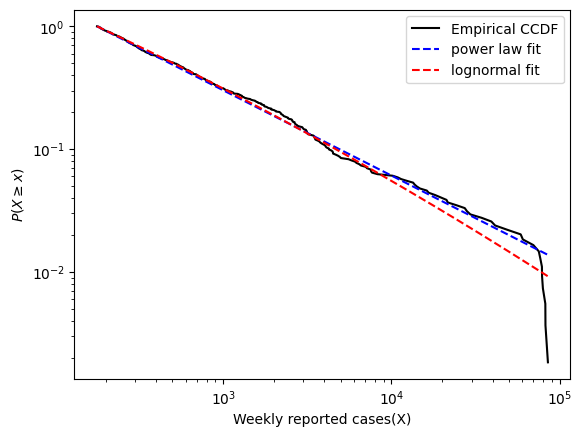

In [138]:

fig, ax = plt.subplots()
# fit.plot_pdf()
fit.plot_ccdf(ax, color='k', label="Empirical CCDF");
fit.power_law.plot_ccdf(df2.casos_est.values, color='b', linestyle='--', ax=ax, label="power law fit");
fit.lognormal.plot_ccdf(df2.casos_est.values, color='r', linestyle='--', ax=ax, label="lognormal fit");
# fit.exponential.plot_ccdf(df2.casos_est.values, color='g', linestyle='--', ax=ax, label="Exponential fit");
plt.xlabel("Weekly reported cases(X)")
plt.ylabel(r"$P(X\geq x)$")
plt.legend()
plt.savefig(f"CCDF_{names[geocode]}.png")


<Axes: >

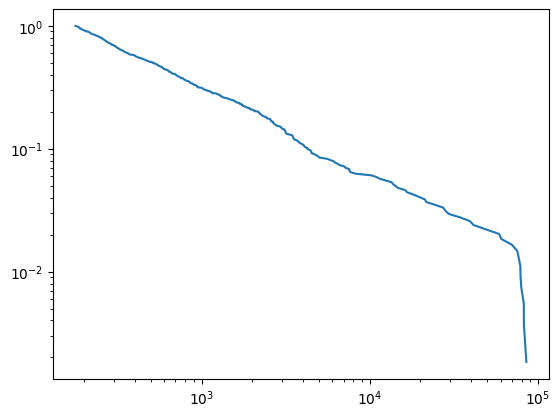

In [89]:
fit.plot_ccdf()